<a href="https://colab.research.google.com/github/leo-h2/Tensorflow-in-practise-Specialization/blob/master/station_model_total_ipynb_rev0.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import os

if os.path.isfile('data_set/total_congress.csv') == True:
  print('already')
else:
  os.mkdir('data_set')
  %cd data_set
  !wget https://raw.githubusercontent.com/leo-h2/h2care-station/main/data_set/total_congress.csv

% cd /





/data_set
--2020-11-03 07:10:27--  https://raw.githubusercontent.com/leo-h2/h2care-station/main/data_set/total_congress.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 446555 (436K) [text/plain]
Saving to: ‘total_congress.csv’

total_congress.csv  100%[===================>] 436.09K  --.-KB/s    in 0.06s   

2020-11-03 07:10:27 (6.76 MB/s) - ‘total_congress.csv’ saved [446555/446555]

/
/


In [4]:
CURR_PATH = os.getcwd()

os.listdir(CURR_PATH)
DATA_PATH = os.path.join(CURR_PATH,'data_set')
RAW_PATH = DATA_PATH + '/total_congress.csv'



In [5]:
df_raw_data = pd.read_csv(RAW_PATH)
df_raw_data.info()

df_raw_data.isnull().sum()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6117 entries, 0 to 6116
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          6117 non-null   int64  
 1   station_name        6117 non-null   int64  
 2   time                6117 non-null   object 
 3   holiday             6117 non-null   bool   
 4   day_week            6117 non-null   object 
 5   weekend             6117 non-null   bool   
 6   temperature         6109 non-null   float64
 7   humid               6109 non-null   float64
 8   precipitation       6109 non-null   float64
 9   precipitation_type  6109 non-null   float64
 10  year                6117 non-null   int64  
 11  month               6117 non-null   int64  
 12  day                 6117 non-null   int64  
 13  hour                6117 non-null   int64  
 14  minute              6117 non-null   int64  
 15  total_car_num       6117 non-null   int64  
dtypes: boo

Unnamed: 0            0
station_name          0
time                  0
holiday               0
day_week              0
weekend               0
temperature           8
humid                 8
precipitation         8
precipitation_type    8
year                  0
month                 0
day                   0
hour                  0
minute                0
total_car_num         0
dtype: int64

In [6]:
df_raw_data.dropna(axis = 0, inplace= True)
df_raw_data.info()

df_raw_data.drop(df_raw_data.loc[df_raw_data['total_car_num'] == 6].index, inplace =True)
df_raw_data.info()

df_raw_data.drop('time', axis=1, inplace = True)
df_raw_data.info()


df_raw_data['day_week'].replace('mon', 0, inplace = True)
df_raw_data['day_week'].replace('tue', 1, inplace = True)
df_raw_data['day_week'].replace('wen', 2, inplace = True)
df_raw_data['day_week'].replace('thu', 3, inplace = True)
df_raw_data['day_week'].replace('fri', 4, inplace = True)
df_raw_data['day_week'].replace('sat', 5, inplace = True)
df_raw_data['day_week'].replace('sun', 6, inplace = True)

df_raw_data['holiday'] = df_raw_data['holiday'].astype(int)
df_raw_data['weekend'] = df_raw_data['weekend'].astype(int)


df_raw_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6109 entries, 0 to 6116
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          6109 non-null   int64  
 1   station_name        6109 non-null   int64  
 2   time                6109 non-null   object 
 3   holiday             6109 non-null   bool   
 4   day_week            6109 non-null   object 
 5   weekend             6109 non-null   bool   
 6   temperature         6109 non-null   float64
 7   humid               6109 non-null   float64
 8   precipitation       6109 non-null   float64
 9   precipitation_type  6109 non-null   float64
 10  year                6109 non-null   int64  
 11  month               6109 non-null   int64  
 12  day                 6109 non-null   int64  
 13  hour                6109 non-null   int64  
 14  minute              6109 non-null   int64  
 15  total_car_num       6109 non-null   int64  
dtypes: boo

,Unnamed: 0,station_name,holiday,day_week,weekend,temperature,humid,precipitation,precipitation_type,year,month,day,hour,minute,total_car_num
0,0,26,0,3,0,23.0,52.0,0.0,0.0,2020,9,17,21,20,2
1,1,26,0,3,0,23.0,52.0,0.0,0.0,2020,9,17,21,38,3
2,2,26,0,4,0,25.3,38.0,0.0,0.0,2020,9,18,16,45,4
3,3,26,0,4,0,25.3,38.0,0.0,0.0,2020,9,18,16,50,4
4,4,26,0,4,0,25.3,38.0,0.0,0.0,2020,9,18,16,55,4


In [7]:
X, y = df_raw_data.iloc[:,2:-1].values, df_raw_data.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify = y)

print('X_rain :', X_train)
print('X_test :', X_test)
print('y_train :', y_train)
print('y_test :', y_test)

X_rain : [[ 1.  5.  1. ...  3. 17. 25.]
 [ 0.  2.  0. ...  9. 17. 25.]
 [ 1.  4.  0. ...  2.  8. 45.]
 ...
 [ 0.  2.  0. ... 14.  9.  5.]
 [ 0.  3.  0. ... 15. 11. 35.]
 [ 0.  1.  0. ... 13.  8.  5.]]
X_test : [[ 0.  3.  0. ... 24. 21. 46.]
 [ 1.  4.  0. ...  9. 22.  5.]
 [ 0.  0.  0. ...  5. 15. 15.]
 ...
 [ 0.  2.  0. ... 14. 21. 30.]
 [ 0.  5.  1. ... 10. 18. 50.]
 [ 1.  5.  1. ...  3. 13. 40.]]
y_train : [3 2 3 ... 3 0 0]
y_test : [4 0 3 ... 2 3 1]


In [8]:
def plot_error(y_train_pred, y_train, y_test_pred, y_test):
    plt.scatter(y_train_pred, 
           y_train_pred - y_train,
           c= 'steelblue',
           edgecolor = 'white',
           marker = 'o',
           s = 35 ,
           alpha = 0.9,
           label = 'Training data')

    plt.scatter(y_test_pred, 
           y_test_pred - y_test,
           c= 'limegreen',
           edgecolor = 'white',
           marker = 'o',
           s = 35 ,
           alpha = 0.9,
           label = 'Test data')

    plt.xlabel('Predicted values')
    plt.ylabel('residuals')
    plt.legend(loc = 'upper left')
    plt.hlines(y =0, xmin = 0, xmax = 5, lw = 2, color = 'black')
    plt.xlim ([0, 5])
    plt.tight_layout()
    plt.show()

In [9]:
def plot_density(y_train, y_test_pred):
    fig,(ax1,ax2)= plt.subplots(ncols=2)
    fig.set_size_inches(12,5)
    sns.distplot(y_train,ax=ax1,bins=10)
    ax1.set(title="train", xlim = ([-1, 6]), ylim = ([0, 0.6]))
    sns.distplot(y_test_pred,ax=ax2,bins=10)
    ax2.set(title="test", xlim = ([-1, 6]), ylim = ([0, 0.6]))

(4886, 12)
(1222, 12)
(4886,)
(1222,)


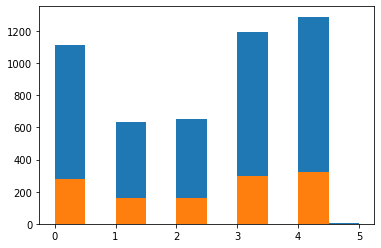

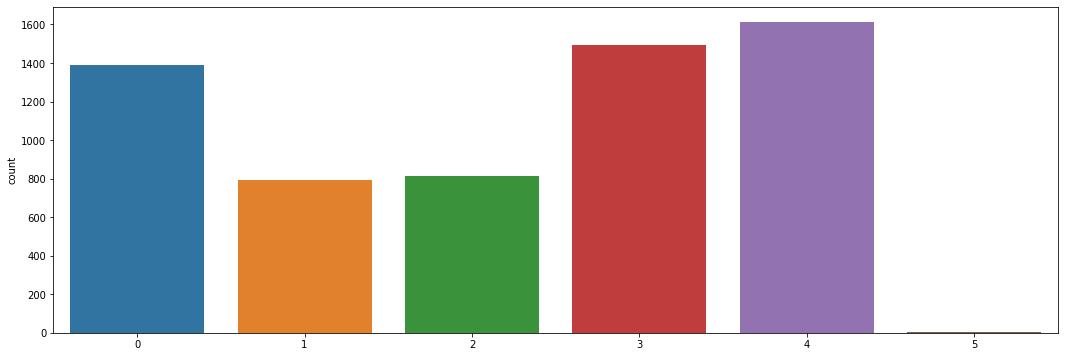

In [10]:
print(X_train.shape) 
print(X_test.shape)  
print(y_train.shape) 
print(y_test.shape)

plt.hist(y_train, bins=10)
plt.hist(y_test, bins=10)
plt.show()

fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)
plt.sca(ax1)
sns.countplot(x = y, ax = ax1)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


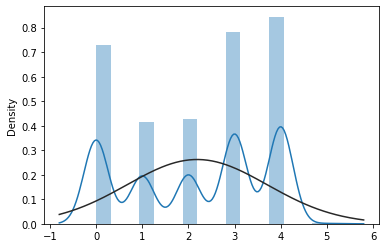

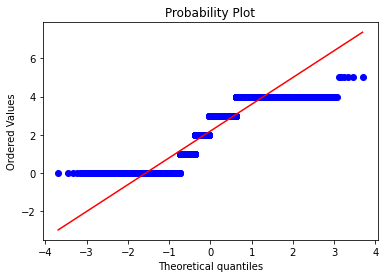

In [11]:
from scipy.stats import norm
from scipy import stats

sns.distplot(y, fit= norm)
fig = plt.figure()
res = stats.probplot(y, plot = plt)

train MSE : 2.010, test MSE: 2.117


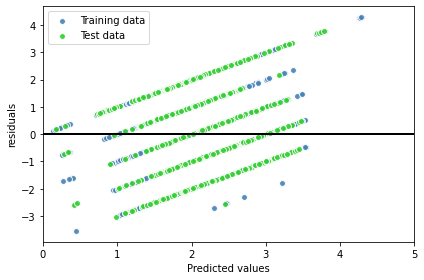

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


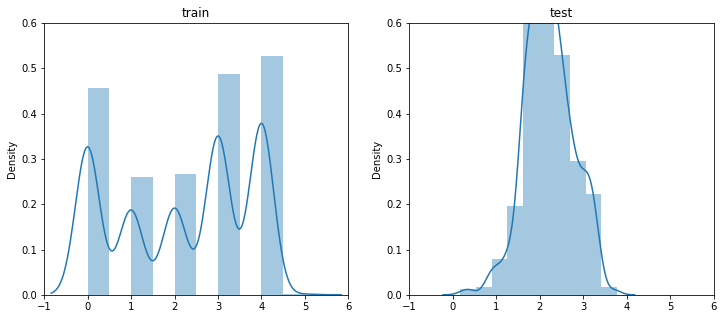

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
import numpy as np

lModel = LinearRegression()


lModel.fit(X_train, y_train)

y_train_pred = lModel.predict(X_train)
y_test_pred = lModel.predict(X_test)


print('train MSE : %.3f, test MSE: %.3f' % (
    mean_squared_error(y_train,y_train_pred), 
    mean_squared_error(y_test,y_test_pred)
))

plot_error(y_train_pred, y_train, y_test_pred, y_test)
plot_density(y_train, y_test_pred)

train MSE : 0.355, test MSE: 0.692


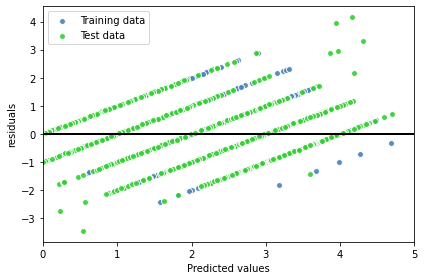

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


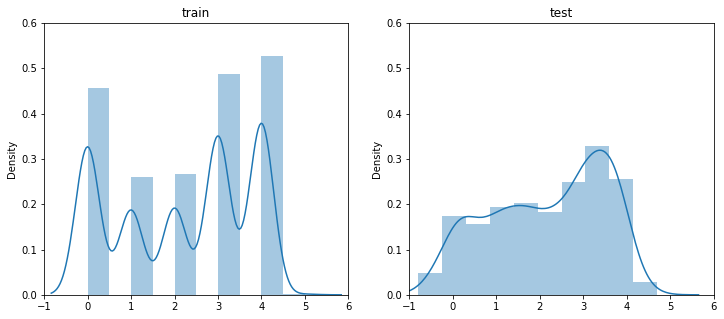

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators = 4000, alpha = 0.01)

gbm.fit(X_train, y_train)

y_train_pred = gbm.predict(X_train)
y_test_pred = gbm.predict(X_test)

print('train MSE : %.3f, test MSE: %.3f' % (
    mean_squared_error(y_train,y_train_pred), 
    mean_squared_error(y_test,y_test_pred)
))

plot_error(y_train_pred, y_train, y_test_pred, y_test)
plot_density(y_train, y_test_pred)

[2.7  1.93 3.04 ... 2.82 0.3  0.76]
[3.04 0.94 3.71 ... 1.47 3.27 1.51]
train MSE : 0.069, test MSE: 0.490


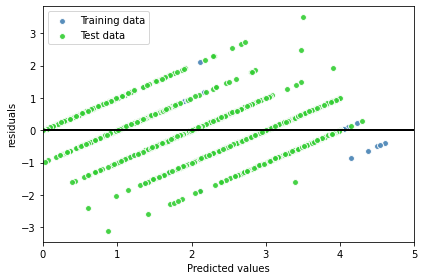

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


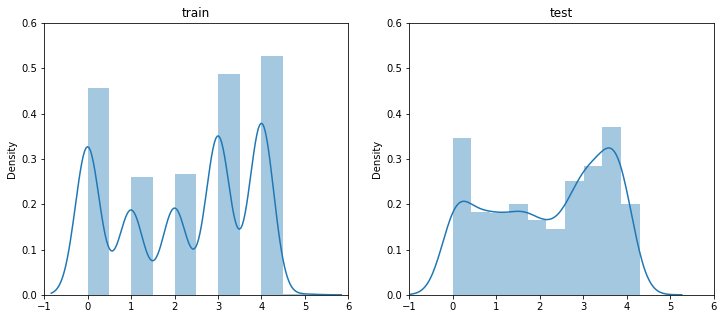

In [14]:
max_depth_list = []

model = RandomForestRegressor(n_estimators = 100,
                              n_jobs = -1,
                              random_state = 0)

model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(y_train_pred)
print(y_test_pred)

print('train MSE : %.3f, test MSE: %.3f' % (
    mean_squared_error(y_train,y_train_pred), 
    mean_squared_error(y_test,y_test_pred)
))

plot_error(y_train_pred, y_train, y_test_pred, y_test)
plot_density(y_train, y_test_pred)

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
print(type(X_train))
X_train.ndim

num_x_signals = X_train.shape[1]
print(num_x_signals)

<class 'numpy.ndarray'>
12


In [47]:
def build_model():
    # model = keras.Sequential([
    #     layers.Dense(64, activation='relu', input_shape = [None, X_train.shape[1]] ),
    #     layers.Dense(64, activation='relu'),
    #     layers.Dense(1)
    # ])
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape = [None, X_train.shape[1]] ),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
        
    # optimizer = tf.keras.optimizers.RMSprop(0.001)
    # optimizer = tf.keras.optimizers.RMSprop(0.001)

    optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)


    # optimizer = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
    
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'accuracy'])
       
    return model

model = build_model()

In [48]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, None, 128)         1664      
_________________________________________________________________
dense_43 (Dense)             (None, None, 64)          8256      
_________________________________________________________________
dense_44 (Dense)             (None, None, 1)           65        
Total params: 9,985
Trainable params: 9,985
Non-trainable params: 0
_________________________________________________________________


In [49]:
# history = model.fit(X_train, y_train, validation_data=( X_test, y_test), epochs=10000, batch_size = 64)
# history = model.fit(X_train, y_train, validation_data=( X_test, y_test), epochs=10000, batch_size = 256)
history = model.fit(X_train, y_train, validation_data=( X_test, y_test), epochs=1000, batch_size = 1000)

# example_batch = X_train
# example_result = model.predict(example_batch)
# example_result

Epoch 1/1000
5/5 [==============================] - 0s 27ms/step - loss: 48326.1680 - mae: 196.0676 - mse: 48326.1680 - accuracy: 0.1302 - val_loss: 13.1927 - val_mae: 3.0279 - val_mse: 13.1927 - val_accuracy: 0.1727
Epoch 2/1000
5/5 [==============================] - 0s 6ms/step - loss: 8107.9009 - mae: 77.2303 - mse: 8107.9009 - accuracy: 0.2172 - val_loss: 18444.8340 - val_mae: 135.7883 - val_mse: 18444.8340 - val_accuracy: 0.2283
Epoch 3/1000
5/5 [==============================] - 0s 5ms/step - loss: 13725.3896 - mae: 115.5809 - mse: 13725.3896 - accuracy: 0.2278 - val_loss: 3636.0229 - val_mae: 60.2535 - val_mse: 3636.0229 - val_accuracy: 0.2283
Epoch 4/1000
5/5 [==============================] - 0s 5ms/step - loss: 1217.8529 - mae: 29.4368 - mse: 1217.8529 - accuracy: 0.1893 - val_loss: 1957.7909 - val_mae: 44.1894 - val_mse: 1957.7909 - val_accuracy: 0.1301
Epoch 5/1000
5/5 [==============================] - 0s 5ms/step - loss: 3584.3750 - mae: 59.2121 - mse: 3584.3750 - accurac

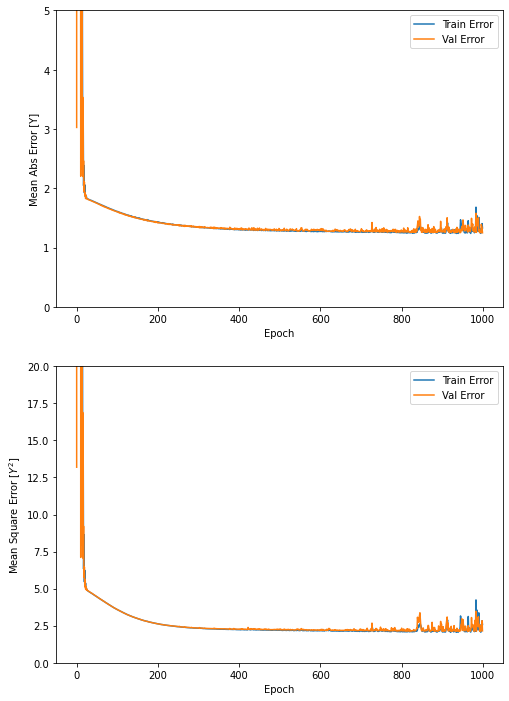

In [50]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Y]')
    plt.plot(hist['epoch'], hist['mae'],
        label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
        label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$Y^2$]')
    plt.plot(hist['epoch'], hist['mse'],
        label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
        label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()

plot_history(history)

In [ ]:
#  loss, accuracy = model.evaluate(X_test, y_test)


39/39 [==============================] - 0s 3ms/step - loss: 2.1981 - mae: 1.3011 - mse: 2.1981 - accuracy: 0.1268


ValueError: ignored

dict_keys(['loss', 'mae', 'mse', 'accuracy', 'val_loss', 'val_mae', 'val_mse', 'val_accuracy'])


Text(0.5, 1.0, 'Training and validation loss')

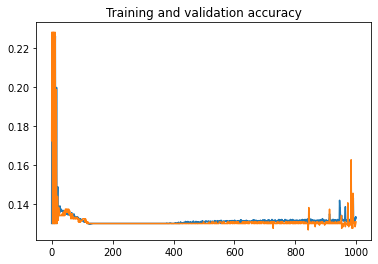

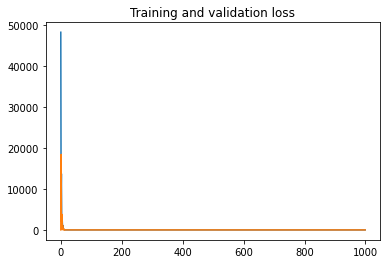

In [51]:
print(history.history.keys())

acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs = range (len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [ ]:
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# history = model.fit(
#     X_train, X_test,
#     epochs=EPOCHS, verbose=0,
#     callbacks=[PrintDot()])

ValueError: ignored